In [7]:
import requests
from bs4 import BeautifulSoup
import re

from config import gaishi, minshuu, vorkers
from selenium import webdriver
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

%matplotlib inline

## 外資就活ドットコム

In [34]:
def show_capture(driver):
    data = driver.page_source.encode('utf-8')
    driver.save_screenshot("test.png")
    im = Image.open("test.png", "r")
    plt.figure(figsize=(12,40))
    plt.imshow(np.array(im))
    return data

In [27]:
# ログインページへのアクセスとログイン
driver = webdriver.PhantomJS(service_log_path=os.path.devnull)
driver.get("https://gaishishukatsu.com/login")
driver.implicitly_wait(1)
username_field = driver.find_element_by_name("data[GsUser][email]")
password_field = driver.find_element_by_name("data[GsUser][password]")
username_field.send_keys(gaishi["email"])
driver.implicitly_wait(1)
password_field.send_keys(gaishi["password"])
driver.implicitly_wait(1)
driver.find_element_by_css_selector("#GsUserLoginForm > div._mt-md.content-center-button > p:nth-child(1) > button").click()

In [29]:
# 三菱商事のページへES一覧ページへアクセス
driver.get("https://gaishishukatsu.com/company/37/study")
source = show_capture(driver)
es_list_page = BeautifulSoup(source, "lxml")

In [30]:
# ESのURL一覧を取得
selection_reports = []
es_list = es_list_page.find_all("a", class_="_panel-content report-list")
for es in es_list:
    url = es["ng-href"]
    if str(url).startswith("https://gaishishukatsu.com/selection_reports/"):
        selection_reports.append(url)

In [63]:
es_url = selection_reports[0]

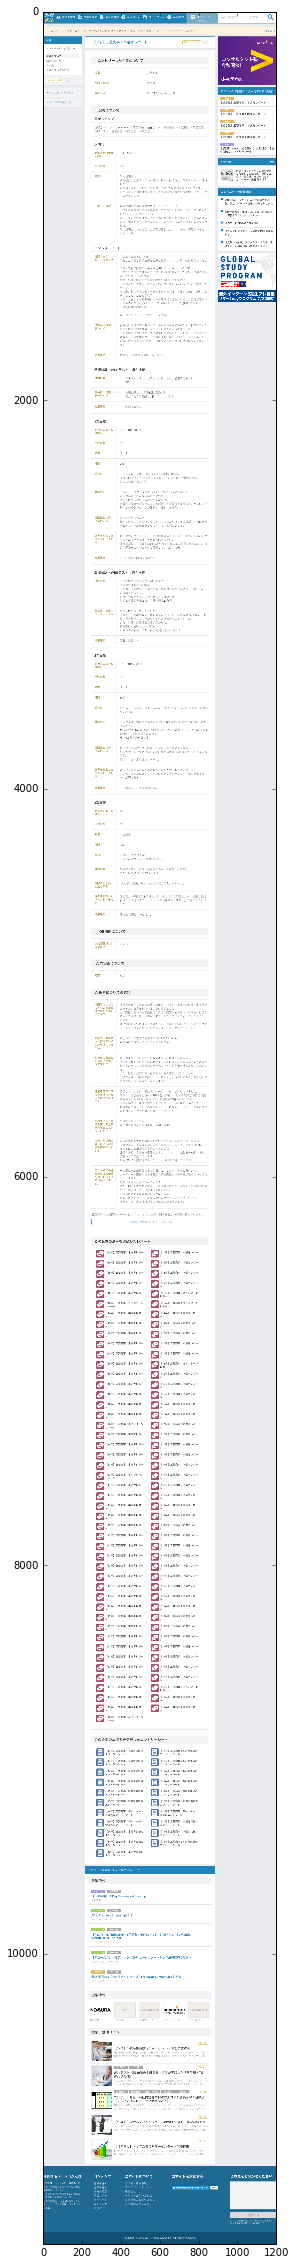

In [64]:
driver.get(es_url)
source = show_capture(driver)
es_page = BeautifulSoup(source, "lxml")

In [80]:
company_sls = {}
for sl_url in selection_reports:
    driver.implicitly_wait(1)
    driver.get(sl_url)
    source = driver.page_source.encode('utf-8')
    sl_page = BeautifulSoup(source, "lxml")
    try:
        importance = sl_page.find("td", class_="impression_importance").text
    except AttributeError:
        importance = ""
    try:
        advice = sl_page.find("td", class_="impression_advice").text
    except:
        advice = ""
    company_sls[sl_url] = {"importance": importance, "advice": advice}

In [82]:
len(company_sls)

94

In [86]:
import json
with open("mitshubishi_shouji.json", "w") as f:
    json.dump(company_sls, f)

## VORKERS

In [5]:
def show_capture(driver):
    data = driver.page_source.encode('utf-8')
    driver.save_screenshot("test.png")
    im = Image.open("test.png", "r")
    plt.figure(figsize=(12,40))
    plt.imshow(np.array(im))
    return data

In [8]:
# ログインページへのアクセスとログイン
driver = webdriver.PhantomJS(service_log_path=os.path.devnull)
driver.get("https://www.vorkers.com/login.php")
driver.implicitly_wait(1)
username_field = driver.find_element_by_name("_username")
password_field = driver.find_element_by_name("_password")
username_field.send_keys(vorkers["email"])
driver.implicitly_wait(1)
password_field.send_keys(vorkers["password"])
driver.implicitly_wait(1)
driver.find_element_by_css_selector("#log_in").click()

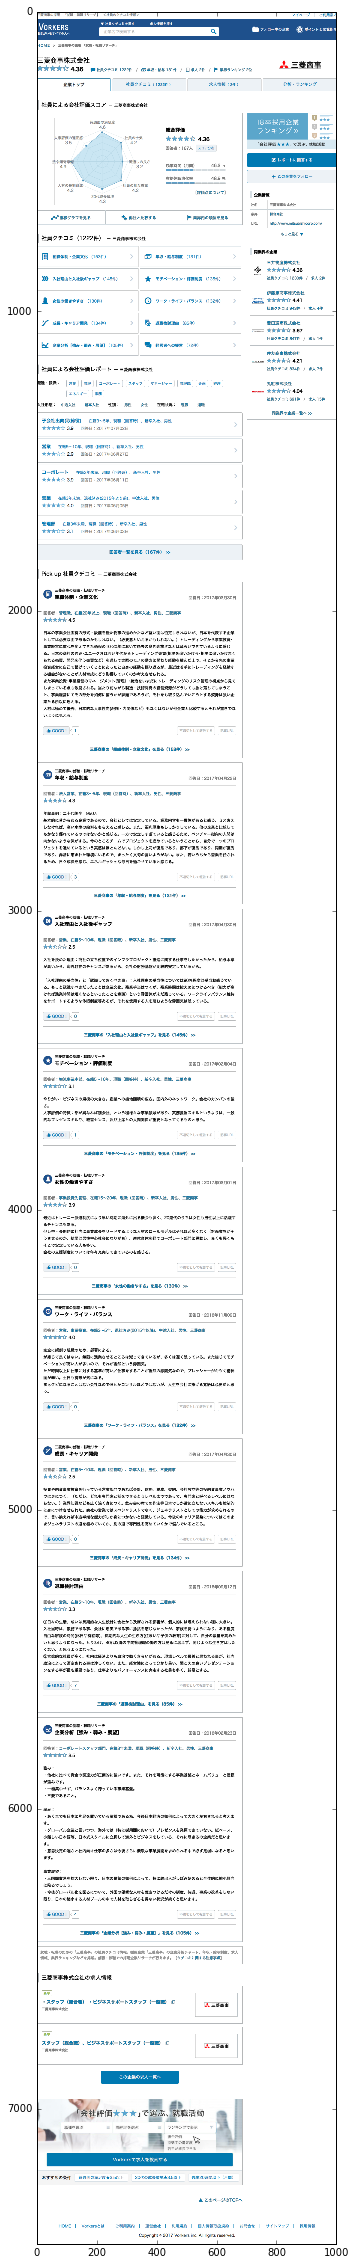

In [9]:
# 三菱商事のページへアクセス
driver.get("https://www.vorkers.com/company.php?m_id=a0910000000Frj0")
source = show_capture(driver)
company_page = BeautifulSoup(source, "lxml")

In [ ]:
radar_chart = {}

In [30]:
scoreList[0].get("class")

['scoreList_item-satisfy']

In [33]:
# レーダーチャートのスコア
radar_elems = company_page.find("ul", class_="scoreList-8").find_all("li")
radar_dic = {}
for radar_elem in radar_elems:
        key = radar_elem.get("class")[0].split("-")[-1]
        description = radar_elem.find("dt").text
        score = radar_elem.find("dd").text
        radar_dic[key] = (description, score)
radar_dic

{'airy': ('風通しの良さ', '3.2'),
 'assess': ('人事評価の適正感', '3.5'),
 'junior': ('20代成長環境', '4.3'),
 'law': ('法令順守意識', '4.9'),
 'satisfy': ('待遇面の満足度', '4.6'),
 'senior': ('人材の長期育成', '4.2'),
 'spirit': ('社員の士気', '4.2'),
 'team': ('社員の相互尊重', '4.2')}

In [30]:
# ESのURL一覧を取得
selection_reports = []
es_list = es_list_page.find_all("a", class_="_panel-content report-list")
for es in es_list:
    url = es["ng-href"]
    if str(url).startswith("https://gaishishukatsu.com/selection_reports/"):
        selection_reports.append(url)

In [63]:
es_url = selection_reports[0]

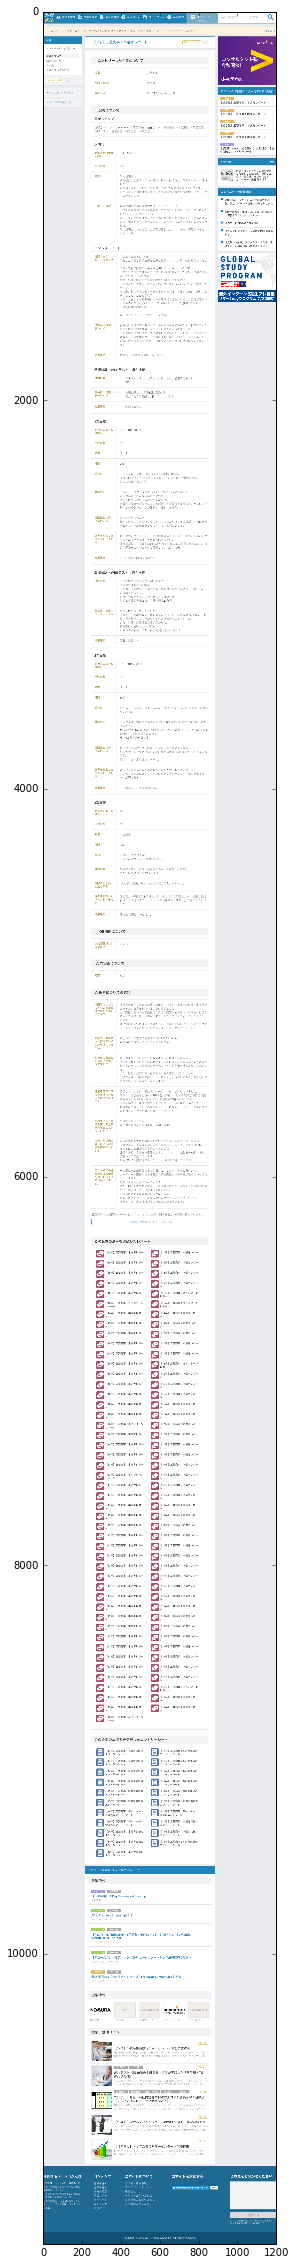

In [64]:
driver.get(es_url)
source = show_capture(driver)
es_page = BeautifulSoup(source, "lxml")

In [80]:
company_sls = {}
for sl_url in selection_reports:
    driver.implicitly_wait(1)
    driver.get(sl_url)
    source = driver.page_source.encode('utf-8')
    sl_page = BeautifulSoup(source, "lxml")
    try:
        importance = sl_page.find("td", class_="impression_importance").text
    except AttributeError:
        importance = ""
    try:
        advice = sl_page.find("td", class_="impression_advice").text
    except:
        advice = ""
    company_sls[sl_url] = {"importance": importance, "advice": advice}

In [82]:
len(company_sls)

94

In [86]:
import json
with open("mitshubishi_shouji.json", "w") as f:
    json.dump(company_sls, f)